In [1]:
# necessary imports
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# Question 1

### part a

In [7]:
prices = pd.read_csv("q1_prices.csv")
prices

,Date,JNJ,MRK,PFE
0,2022-03-07,167.67,74.79,46.40
1,2022-03-08,164.27,74.04,45.88
2,2022-03-09,164.90,74.85,47.14
3,2022-03-10,165.19,74.94,47.58
4,2022-03-11,164.89,75.30,48.61
...,...,...,...,...
245,2023-02-27,155.63,108.60,40.78
246,2023-02-28,153.26,105.51,40.57
247,2023-03-01,152.57,105.91,40.18
248,2023-03-02,152.45,106.27,40.62


In [10]:
from numpy.random import normal
z1 = normal(loc=0, scale=1, size=10000)
z2 = normal(loc=0, scale=1, size=10000)
z3 = normal(loc=0, scale=1, size=10000)

S1 = 154.02*np.exp(0.05*z1)
S2 = 106.14*np.exp(0.03*z1 + 0.01*z2)
S3 = 41.15*np.exp(0.03*z1 + 0.01*z2 + 0.02*z3)

### part b

In [12]:
portfolio = (1.2*S1 + 2.5*S2 + 3.5*S3)*(10**6)
portfolio

array([5.91377322e+08, 5.74848726e+08, 6.04931003e+08, ...,
       5.73606146e+08, 5.52758780e+08, 6.05168758e+08])

In [13]:
cur_price_port = (1.2*154.02 + 2.5*106.14 + 3.5*41.15)*(10**6)
change = portfolio - np.array([cur_price_port for i in range(10000)])
change

array([ -2821677.63998044, -19350274.01240635,  10732003.32335091, ...,
       -20592854.42997265, -41440219.86699843,  10969757.85770011])

In [14]:
VaR = np.percentile(change,0.99)
VaR

-48742291.77765883

### part c

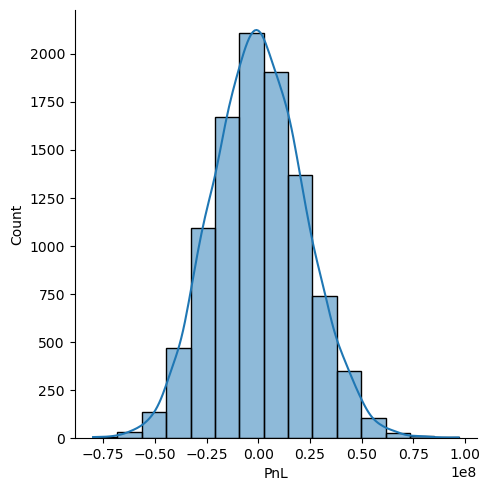

In [18]:
import seaborn as sns
sns.displot(change, kde=True, bins=15).set(xlabel = "PnL")

### part d

In [21]:
prices

,Date,JNJ,MRK,PFE
0,2022-03-07,167.67,74.79,46.40
1,2022-03-08,164.27,74.04,45.88
2,2022-03-09,164.90,74.85,47.14
3,2022-03-10,165.19,74.94,47.58
4,2022-03-11,164.89,75.30,48.61
...,...,...,...,...
245,2023-02-27,155.63,108.60,40.78
246,2023-02-28,153.26,105.51,40.57
247,2023-03-01,152.57,105.91,40.18
248,2023-03-02,152.45,106.27,40.62


In [22]:
jnj = prices["JNJ"]
mrk = prices["MRK"]
pfe = prices["PFE"]

In [32]:
def vol(data):
    returns = np.log(data) - np.log(data.shift(1))
    returns_ewm = returns.ewm(alpha=0.06, adjust=True)
    ewm_mean = returns_ewm.mean()
    ewm_std = returns_ewm.std()
    return (ewm_std[249])**2

In [33]:
print(f"For JNJ {vol(jnj)}")
print(f"For MRk {vol(mrk)}")
print(f"For PFE {vol(pfe)}")

For JNJ 9.865669821513314e-05
For MRk 0.00016818304556846117
For PFE 0.00014346095083639742


### part e

In [35]:
deno = 0.03165
print((0.05/deno)**2)
print((0.04/deno)**2)
print((0.06/deno)**2)
# we can see that they are not the same here

2.495701154760925
1.5972487390469916
3.593809662855731


# Question 2

### part a

In [61]:
data = pd.read_csv("q2_data.csv")
data

,Date,OIL,USDX,GOLD,DJI
0,2021-03-08,65.05,92.31,1677.7,31802.44
1,2021-03-09,64.01,91.96,1716.6,31832.74
2,2021-03-10,64.44,91.79,1721.5,32297.02
3,2021-03-11,66.02,91.42,1722.3,32485.59
4,2021-03-12,65.61,91.68,1719.5,32778.64
...,...,...,...,...,...
502,2023-02-27,75.68,104.67,1817.0,32889.09
503,2023-02-28,77.05,104.87,1828.9,32656.70
504,2023-03-01,77.69,104.48,1837.7,32661.84
505,2023-03-02,78.16,105.03,1833.5,33003.57


In [63]:
# Split data into features (X) and target (y)
X = data.drop('DJI', axis=1)
y = data['DJI']
X = X.dropna()
y = y.dropna()
X = X.drop("Date", axis = 1)
X

,OIL,USDX,GOLD
0,65.05,92.31,1677.7
1,64.01,91.96,1716.6
2,64.44,91.79,1721.5
3,66.02,91.42,1722.3
4,65.61,91.68,1719.5
...,...,...,...
502,75.68,104.67,1817.0
503,77.05,104.87,1828.9
504,77.69,104.48,1837.7
505,78.16,105.03,1833.5


In [64]:
dji_prices = y
dji_returns = np.log(dji_prices) - np.log(dji_prices.shift(1))
dji_returns = dji_returns.dropna()

In [65]:
dji_returns = dji_returns.loc[3:]
dji_returns

3      0.005822
4      0.008980
5      0.005319
6     -0.003877
7      0.005754
         ...   
502    0.002197
503   -0.007091
504    0.000157
505    0.010408
506    0.011670
Name: DJI, Length: 504, dtype: float64

In [66]:
labels = dji_returns.apply(lambda x: 1 if x > 0 else -1)
labels

3      1
4      1
5      1
6     -1
7      1
      ..
502    1
503   -1
504    1
505    1
506    1
Name: DJI, Length: 504, dtype: int64

In [67]:
X_train, X_test = np.array(X[:400]),np.array(X[400:504])
y_train, y_test = labels[:400], labels[400:]

In [68]:
X_train, X_test

(array([[  65.05,   92.31, 1677.7 ],
        [  64.01,   91.96, 1716.6 ],
        [  64.44,   91.79, 1721.5 ],
        ...,
        [  78.5 ,  114.11, 1626.7 ],
        [  82.15,  112.6 , 1660.4 ],
        [  81.23,  112.25, 1658.5 ]]),
 array([[  79.49,  112.12, 1662.4 ],
        [  83.63,  111.75, 1692.9 ],
        [  86.52,  110.07, 1721.1 ],
        [  87.76,  111.07, 1711.4 ],
        [  88.45,  112.26, 1711.7 ],
        [  92.64,  112.8 , 1700.5 ],
        [  91.13,  113.14, 1667.3 ],
        [  89.35,  113.22, 1678.7 ],
        [  87.27,  113.32, 1670.3 ],
        [  89.11,  112.36, 1670.  ],
        [  85.61,  113.31, 1641.7 ],
        [  85.46,  112.04, 1657.  ],
        [  82.82,  112.13, 1649.  ],
        [  85.55,  112.98, 1627.5 ],
        [  85.98,  112.88, 1630.8 ],
        [  85.05,  112.01, 1651.  ],
        [  84.58,  111.99, 1648.7 ],
        [  85.32,  110.95, 1652.8 ],
        [  87.91,  109.7 , 1664.  ],
        [  89.08,  110.59, 1660.7 ],
        [  87.9 ,  110.

In [69]:
y_train, y_test

(3      1
 4      1
 5      1
 6     -1
 7      1
       ..
 398    1
 399   -1
 400   -1
 401    1
 402    1
 Name: DJI, Length: 400, dtype: int64,
 403   -1
 404   -1
 405   -1
 406   -1
 407    1
       ..
 502    1
 503   -1
 504    1
 505    1
 506    1
 Name: DJI, Length: 104, dtype: int64)

### part b

In [70]:
# create random forest model
model_rf = RandomForestRegressor(max_depth = 3,
                                 random_state=8990,
                                 max_features = 1,
                                 max_leaf_nodes = 10,
                                 n_estimators = 5)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features=1, max_leaf_nodes=10,
                      n_estimators=5, random_state=8990)

In [72]:
print(f"Test score of the decision tree is {model_rf.score(X_test, y_test)}")

Test score of the decision tree is -0.11409456554524144


### part c

In [79]:
# Extract single tree
estimators = model_rf.estimators_
estimators

[DecisionTreeRegressor(max_depth=3, max_features=1, max_leaf_nodes=10,
                       random_state=278794167),
 DecisionTreeRegressor(max_depth=3, max_features=1, max_leaf_nodes=10,
                       random_state=59160543),
 DecisionTreeRegressor(max_depth=3, max_features=1, max_leaf_nodes=10,
                       random_state=44438419),
 DecisionTreeRegressor(max_depth=3, max_features=1, max_leaf_nodes=10,
                       random_state=403416065),
 DecisionTreeRegressor(max_depth=3, max_features=1, max_leaf_nodes=10,
                       random_state=1071104409)]

In [81]:
def stats(dt):
    depth = dt.get_depth()
    feature_important = dt.feature_importances_
    tst_score = dt.score(X_test, y_test)
    leaves = dt.get_n_leaves
    return depth, leaves, feature_important, tst_score

for i in range(len(estimators)):
    print(stats(estimators[i]))


(3, <bound method BaseDecisionTree.get_n_leaves of DecisionTreeRegressor(max_depth=3, max_features=1, max_leaf_nodes=10,
                      random_state=278794167)>, array([0.42651767, 0.18610082, 0.38738152]), -0.2909938323893366)
(3, <bound method BaseDecisionTree.get_n_leaves of DecisionTreeRegressor(max_depth=3, max_features=1, max_leaf_nodes=10,
                      random_state=59160543)>, array([0.27831965, 0.19785702, 0.52382333]), -0.3715346472434069)
(3, <bound method BaseDecisionTree.get_n_leaves of DecisionTreeRegressor(max_depth=3, max_features=1, max_leaf_nodes=10,
                      random_state=44438419)>, array([0.28048408, 0.44308682, 0.2764291 ]), -0.19100340136054417)
(3, <bound method BaseDecisionTree.get_n_leaves of DecisionTreeRegressor(max_depth=3, max_features=1, max_leaf_nodes=10,
                      random_state=403416065)>, array([0.49823735, 0.32056133, 0.18120132]), -0.19838778645596844)
(3, <bound method BaseDecisionTree.get_n_leaves of DecisionT

### part d

In [95]:
dji_prices = data[data["Date"] >= "2022-12-06"]
dji_prices

,Date,OIL,USDX,GOLD,DJI
446,2022-12-06,74.25,105.58,1769.3,33596.34
447,2022-12-07,72.01,105.10,1785.5,33597.92
448,2022-12-08,71.46,104.77,1788.7,33781.48
449,2022-12-09,71.02,104.81,1798.1,33476.46
450,2022-12-12,73.17,105.13,1780.5,34005.04
...,...,...,...,...,...
502,2023-02-27,75.68,104.67,1817.0,32889.09
503,2023-02-28,77.05,104.87,1828.9,32656.70
504,2023-03-01,77.69,104.48,1837.7,32661.84
505,2023-03-02,78.16,105.03,1833.5,33003.57


In [99]:
capital = 10000 # initial capital amount
shares = 0 # number of shares held

predicted_labels = model_rf.predict(X_test[43:])
for i in range(len(predicted_labels)):
    j = 404 + i # starting 1st October
    signal = predicted_labels[i]
    if signal == 1 and shares == 0:
        shares = capital / dji_prices[j]
        capital = 0
    elif signal == -1 and shares > 0:
        capital = shares * dji_prices[j]
        shares = 0

final_amount = (capital + shares * dji_prices[-1])
print(f'Final amount for model based trading strategy: ${final_amount:.5f}')

KeyError: -1

### part e

In [87]:
data = pd.read_csv("q2_data.csv")
data

,Date,OIL,USDX,GOLD,DJI
0,2021-03-08,65.05,92.31,1677.7,31802.44
1,2021-03-09,64.01,91.96,1716.6,31832.74
2,2021-03-10,64.44,91.79,1721.5,32297.02
3,2021-03-11,66.02,91.42,1722.3,32485.59
4,2021-03-12,65.61,91.68,1719.5,32778.64
...,...,...,...,...,...
502,2023-02-27,75.68,104.67,1817.0,32889.09
503,2023-02-28,77.05,104.87,1828.9,32656.70
504,2023-03-01,77.69,104.48,1837.7,32661.84
505,2023-03-02,78.16,105.03,1833.5,33003.57


In [88]:
dji_prices = data[data["Date"] >= "2022-12-06"]
dji_prices

,Date,OIL,USDX,GOLD,DJI
446,2022-12-06,74.25,105.58,1769.3,33596.34
447,2022-12-07,72.01,105.10,1785.5,33597.92
448,2022-12-08,71.46,104.77,1788.7,33781.48
449,2022-12-09,71.02,104.81,1798.1,33476.46
450,2022-12-12,73.17,105.13,1780.5,34005.04
...,...,...,...,...,...
502,2023-02-27,75.68,104.67,1817.0,32889.09
503,2023-02-28,77.05,104.87,1828.9,32656.70
504,2023-03-01,77.69,104.48,1837.7,32661.84
505,2023-03-02,78.16,105.03,1833.5,33003.57


In [89]:
# Simple Buy and Hold Strategy Implementation
# Number of shares bought on Oct 1st 2020 with initial capital
num_shares = 10000 / 33596.34
# Final amount at market close of Dec 31st 2020
final_amount = num_shares * 33390.97
print(f"Final amount for buy-and-hold strategy: ${np.round(final_amount, 5)}")

Final amount for buy-and-hold strategy: $9938.87132


In [90]:
final_amounts = num_shares * np.array(dji_prices["DJI"])
final_amounts

array([10000.        , 10000.47028932, 10055.10719322,  9964.31754173,
       10121.65015594, 10152.48684827, 10110.13402055,  9882.6896025 ,
        9798.82332421,  9750.32994665,  9777.77341222,  9934.55834772,
        9830.68096108,  9883.19858651,  9894.39921134,  9785.50342091,
        9888.21996682,  9866.32770117,  9863.08925317,  9902.79595932,
        9801.68673135, 10010.20051589,  9976.5778058 , 10032.07492245,
       10112.11637934, 10176.69484235, 10210.22230398, 10210.22230398,
       10093.61436395,  9910.8891028 ,  9835.76187168,  9934.26367277,
       10009.88798185, 10040.96279535, 10043.90359188, 10105.09180464,
       10113.6254723 , 10035.94141505, 10145.75992504, 10147.81967321,
       10136.20531284, 10098.12676024, 10087.71193529, 10166.78900142,
       10104.97274405, 10030.81883324, 10081.23801581, 10193.35141864,
       10146.72133929, 10158.26426331, 10029.91694929, 10068.5640162 ,
        9861.07117621,  9835.91962696,  9868.31005996,  9768.00449097,
      

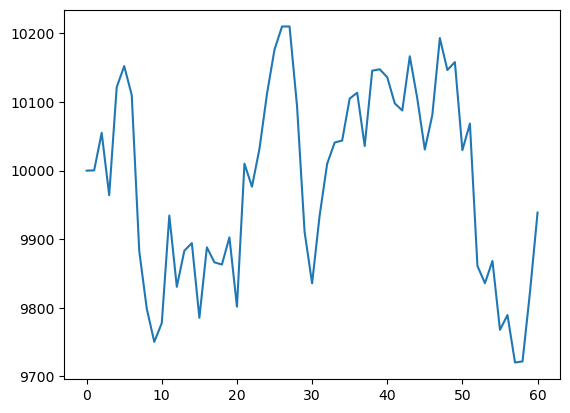

In [94]:
# plot for the buy and hold strategy
x = [i for i in range(len(dji_prices))]
plt.plot(x,final_amounts)